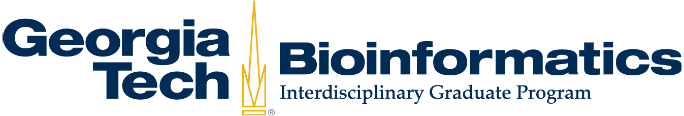

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 4 (Ploygenic Risk Scores) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 15th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Knowing your data**
### *Total Questions: 6*
### *Total Points: 5+5+10+10+20+30 = 80*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Your Phenotype and Population of interest</h3>
    <p>You will find this in the announcement section of your group</p>
</div>

<div class="alert alert-block alert-success">
    <h3>Response 1.1</h3> 
    <p>Our disease of interest is: Hemoglobin A1C. and our population of interest is: South Asian</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>1.2 Check source VCF file</h3>
    <p>Show that you can access these VCF files. Show the first 10 variant IDs from chromosome 15.</p>
</div>

In [5]:
#For this project, you will use VCF file from phase 3 1000Genomes.
!ls -lh /storage/ice-shared/biol6150/Data/1000GenomesAll/ | head

total 15G
-rw-r--r-- 1 ssharma454 gtperson 742M Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 736M Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 711M Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 534M Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson  91K Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 482M Aug  4  2021 phase3.chr14.GRCh38.GT.crossmap.vcf.gz


In [4]:
#Show the first 10 variant IDs from chromosome 15. You bash command goes here.
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep -E '^[^#]' | awk '{print $3}' | head -n 10

rs371549847
rs565090028
rs201219124
rs373298708
rs560310552
rs552896638
rs542841371
rs561207761
rs531597354
rs61997842
awk: cmd. line:1: (FILENAME=- FNR=689) fatal: print to "standard output" failed (Broken pipe)
grep: write error

gzip: stdout: Broken pipe


<div class="alert alert-block alert-warning">
    <h3>1.3 How many samples are present in these set of VCF files</h3>
    <p>You can do this using a series of bash commands, or a tool of your choice. But you have to show how you got the total number. You don't have to run this on all VCF files. Just one will work.</p>
</div>

In [5]:
#Get the samples present in the VCF file.
!bcftools stats /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz | grep 'number of samples'

SN	0	number of samples:	2504


<div class="alert alert-block alert-warning">
    <h3>1.4 How many variants are present in chromosome 12 VCF file</h3>
    <p>Use a tools or a bash command. Up to you.</p>
</div>

In [17]:
#Your command for getting the number of variants here.
!bcftools stats /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz | grep 'number of records'
# According to BCFtools 'number of records' refers to the total number of rows in the VCF file that cover SNPs, MNPs, indels, and other variants. 

#   number of records   .. number of data rows in the VCF
SN	0	number of records:	3885458


<div class="alert alert-block alert-warning">
    <h3>1.5 Indexing VCF files</h3>
    <p><b>1.5.1</b> Do the VCF files have a matched tabix file in the shared directory?</p>
    <p><b>1.5.1</b> Using tabix, write the number of variants that lie between genomic positions 15,000,000-15,500,500 on chromosome 22?</p>
</div>

In [11]:
#Your answers here.
# 1.5.1 yes, there is a matching tabix file
!tabix -p vcf /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr22.GRCh38.GT.crossmap.vcf.gz chr22:15000000-15500500 | wc -l

4997


<div class="alert alert-block alert-warning">
    <h3>1.6 Extract the samples of interest</h3>
    <p>You have source 1000 genomes files and a continental population of interest.</p>
    <p><b>1.6.1</b> Write the 1000 genomes population that come from the continental population of interest</p>
    <p><b>1.6.2</b> Extract the samples that come from this population. The final output will be a set of 22 VCF GZ files that have a fraction of total samples present in the source VCF file. <b>Show and briefly explain any helper files you have used for this step.</b></p>
    <p><b>1.6.3</b> How many samples are present in your final VCF file?</p>
</div>

In [79]:
#Write the 3 letter codes of the populations of interest.
#Our population of interest is South Asians. The 3 letter code is 'SAS'

In [ ]:
#Write the commands used for extraction.
!cat /home/hice1/cwijeyesekera3/scratch/Data/Project4/igsr_samples.tsv | awk -F'\t' '$6 == "SAS" { print $1 }' > /home/hice1/cwijeyesekera3/scratch/Data/Project4/south_asian_samples.txt
!for chr in {1..22}; do bcftools view -S /home/hice1/cwijeyesekera3/scratch/Data/Project4/south_asian_samples.txt -Oz -o /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr${chr}_south_asian_population.vcf.gz /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr${chr}.GRCh38.GT.crossmap.vcf.gz --force-samples; done

In [51]:
#Extract the total number of samples present in your final VCF file.
vcf_paths = ["/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr1_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr2_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr3_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr4_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr5_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr6_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr7_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr8_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr9_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr10_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr11_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr12_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr13_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr14_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr15_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr16_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr17_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr18_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr19_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr20_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr21_south_asian_population.vcf.gz",
             "/home/hice1/cwijeyesekera3/scratch/Data/Project4/chr22_south_asian_population.vcf.gz"]
vcf_str = " ".join(vcf_paths)

!bcftools concat $vcf_str -o /home/hice1/cwijeyesekera3/scratch/Data/Project4/south_asians_merged.vcf.gz



Checking the headers and starting positions of 22 files
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr1_south_asian_population.vcf.gz	107.417706 seconds
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr2_south_asian_population.vcf.gz	116.654762 seconds
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr3_south_asian_population.vcf.gz	97.923444 seconds
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr4_south_asian_population.vcf.gz	98.051596 seconds
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr5_south_asian_population.vcf.gz	87.580105 seconds
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr6_south_asian_population.vcf.gz	87.744366 seconds
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr7_south_asian_population.vcf.gz	79.883313 seconds
Concatenating /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr8_south_asian_population.vcf.gz	76.123559 seconds
Concatenating 

# **2. Annotating variants**
### *Total Questions: 2*
### *Total Points: 20+20+60 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Find clinically important genes</h3>
    <p>Different genes perform different functions in our body. Is there a way we can find clincically important genes for humans? Search on web and find a resource that can tell you which genes are clinically important (there can be multiple answers)</p>
</div>

#What was the resource that you identified? Give a 1-3 line description and the web link.

We identified the Online Mendelian Inheritance in Man (OMIM) Database. The OMIM is a 'comprehensive, authoritative compendium of human genes and genetic phenotypes' that contains info on known menedalian genes and genetic phenotypes. 
https://www.omim.org/

<div class="alert alert-block alert-warning">
    <h3>2.2 Varints in those genes</h3>
    <p><b>2.2.1</b> For your population, can you identify a set of genes (3-8 genes; not a lot) that might be clinically relevant? If not, then try finding clincially important genes for all humans and use them.</p>
    <p><b>2.2.2</b> In any one of the genes identified above, can you find a variant (dbSNP ID) which has a HIGH or MODERATE variant effect consequence? <i>Hint:</i> https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html</p>
</div>

#You answers here.
2.2.1 - BRCA1, HBB, CFTR, TP53
2.2.2 - We used HBB - dbSNP ID: rs1589891039

<div class="alert alert-block alert-warning">
    <h3>2.3 Select a gene</h3>
    <p><b>2.3.1 </b>Select a clinically relevant gene from the list in <i>2.2.1</i> and create a new VCF file which:</p> 
    <p>1. Has all the samples from your continental population of interest</p>
    <p>2. Has only the variants which exist on the gene of interest</p>
    <p><b>Note:</b> If you end up with no variants, then try another gene. It is important that you find some variants before you move forward.
        <hr>
    <p><b>2.3.2 </b>How many individuals in the VCF file (subset of your continental population) carry a variant with a HIGH or MODERATE consequence (let's use ensembl consequence definitions for this question; as used above). Print their 1000 genomes ID.</p>
</div>

In [46]:
#Show your commands and results here. Add more cells as required.
# WRITE WITH PROPER INPUTS AND COORDINATES
!bcftools view -O z -o /home/hice1/cwijeyesekera3/scratch/Data/Project4/HBB_subset.vcf.gz -r chr11:5225464-5229395 /home/hice1/cwijeyesekera3/scratch/Data/Project4/chr11_south_asian_population.vcf.gz
!bcftools stats /home/hice1/cwijeyesekera3/scratch/Data/Project4/HBB_subset.vcf.gz | grep 'number of samples'
# 2.3.2 WE HAVE LIST OF RELEV
!cat /home/hice1/cwijeyesekera3/scratch/Data/Project4/ensembl-HBB-High-Med-Variants.csv | awk -F',' 'NR > 1 { print $1 }' > /home/hice1/cwijeyesekera3/scratch/Data/Project4/HBB-High-Moderate-Variants.txt

!vcftools --gzvcf /home/hice1/cwijeyesekera3/scratch/Data/Project4/HBB_subset.vcf.gz --snps /home/hice1/cwijeyesekera3/scratch/Data/Project4/HBB-High-Moderate-Variants.txt --recode --recode-INFO-all --out /home/hice1/cwijeyesekera3/scratch/Data/Project4/HBB-High-Med-Variants
!bcftools query -f'[%CHROM %POS %ID %SAMPLE %GT\n]' -i 'GT="alt"' /home/hice1/cwijeyesekera3/scratch/Data/Project4/HBB-High-Med-Variants.recode.vcf | awk '{print $4}' | sort -u

HG01586
HG01589
HG01593
HG02491
HG02493
HG02494
HG02597
HG02600
HG02601
HG02603
HG02604
HG02648
HG02649
HG02651
HG02652
HG02654
HG02655
HG02657
HG02658
HG02660
HG02661
HG02681
HG02682
HG02684
HG02685
HG02687
HG02688
HG02690
HG02691
HG02694
HG02697
HG02699
HG02700
HG02724
HG02725
HG02728
HG02731
HG02734
HG02736
HG02737
HG02774
HG02775
HG02780
HG02783
HG02784
HG02786
HG02787
HG02790
HG03006
HG03007
HG03009
HG03012
HG03016
HG03018
HG03019
HG03021
HG03022
HG03228
HG03229
HG03234
HG03235
HG03237
HG03488
HG03490
HG03491
HG03585
HG03589
HG03593
HG03594
HG03595
HG03598
HG03600
HG03603
HG03604
HG03607
HG03611
HG03615
HG03616
HG03619
HG03624
HG03625
HG03631
HG03634
HG03636
HG03640
HG03643
HG03644
HG03646
HG03649
HG03652
HG03660
HG03668
HG03672
HG03673
HG03679
HG03680
HG03681
HG03684
HG03685
HG03686
HG03689
HG03693
HG03694
HG03695
HG03696
HG03697
HG03698
HG03702
HG03703
HG03706
HG03708
HG03709
HG03711
HG03713
HG03714
HG03716
HG03717
HG03718
HG03720
HG03722
HG03727
HG03730
HG03733
HG03736
HG03738


# **3. PGS catalog**
### *Total Questions: 1*
### *Total Points: 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Select a PGS summary stat file</h3>
    <p>Go to PGS Catalog and find a summary statistics that is relevant to the continental population of interest and the disease assigned to you.</p>
    <p><b>3.1.1</b> Talk about why you selected this PGS file. (1-3 lines)</p>
    <p><b>3.1.2</b> Write the PGP and PGS website links for the files selected.</p>
    <p><b>3.1.3</b> Can you find the train and test sizes used in the publication? What was the distribtion (by continental ancestry; eg: European, African, EastAsian, etc.) for the samples used in training?</p>
</div>

#All answers go here. 1-3 lines in general for each.
3.1.1 - We selected the file PGS002331. We did this because it had the highest number of variants and the highester percentage of our continental population of interest (SOUTH ASIA)

3.1.2 - 

PSG- https://www.pgscatalog.org/score/PGS002331/
PGP - tps://www.pgscatalog.org/publication/PGP000332/

3.1.3 - The training size was 2,000 (500 in each population (EUR, AFR, EAS, SAS)). The distribution would then just be 25% for each of the 4 populations. The test size was 42k non-British Europeans, 7.7k South Asians, 900 East Asian, 6200 Africans for a grand total of 56.8k. 

# **4. Polygenic risk scores**
### *Total Questions: 3*
### *Total Points: 30+40+30 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>4.1 Harmonize the variant IDs between your VCF file and the PGS summary stat file</h3>
    <p>Variants are identified in a variety of ways (dbSNP) being one of them. It's a good idea to have one single VCF file and a single summary stat file.<b>Hint:</b> This might be a good time to convert your VCF files to a Plink2 format (makes things easier and faster)</p>
    <hr>
    <p><b>Question:</b> Write the % of variants present in the summary stat that are also present in your VCF file? Mention <b>total n</b> and <b>overlapping n.</b></p>
</div>

In [10]:
#Put all the code and comments here.
#/home/hice1/cwijeyesekera3/scratch/Data/Project4/PGS002331_hmPOS_GRCh38.txt
!cat /home/hice1/cwijeyesekera3/scratch/Data/Project4/PGS002331_hmPOS_GRCh38.txt | grep -v "#" | awk 'NR>1{ print $1"\:"$2"\t"$3"\t"$5  }' > /home/hice1/cwijeyesekera3/scratch/Data/Project4/PGS002331_hmPOS_GRCh38.forPlink.txt
!zcat /home/hice1/cwijeyesekera3/scratch/Data/Project4/south_asians_merged_adj1.vcf.gz | awk 'BEGIN{OFS="\t"} /^#/ {print; next} {split($1, a, "chr"); $1 = a[2]; $3 = $1":"$2; print}' | bgzip > /home/hice1/cwijeyesekera3/scratch/Data/Project4/south_asians_merged_adj1.vcf.gz
!plink2 --vcf /home/hice1/cwijeyesekera3/scratch/Data/Project4/south_asians_merged_adj1.vcf.gz --make-pgen --out /home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/south_asians

In [2]:
#Show that the variant IDs are also overlapping.
# WRITE A LOOP THAT COUNTS TOTAL N in VCF FILE. THEN CHECKS IF VARIANT ID IN SUMMARY STATISTIC IS IN VCF FILE. COUNT THOSE. THEN DIVIDE OVERLAPPING BY TOTAL
total_ids_command = "zcat /home/hice1/cwijeyesekera3/scratch/Data/Project4/south_asians_merged_adj1.vcf.gz | grep -v '^#' | awk '{print $3}' | sort | uniq"
total_ids = !{total_ids_command}
summary_command = "cat /home/hice1/cwijeyesekera3/scratch/Data/Project4/PGS002331_hmPOS_GRCh38.forPlink.txt | grep -v '^#' | awk '{print $1}' | sort | uniq"
summary_ids = !{summary_command}

10:10


In [21]:
overlap_ids = set(list(total_ids)) & set(list(summary_ids))
overlap_list = list(overlap_ids)
summary_num = len(summary_ids)
total_ids_num = len(total_ids)
overlap_num = len(overlap_ids)

In [32]:
percent_of_variant_from_summary = round((overlap_num/summary_num) * 100,2)
print("Of the total",summary_num,"variants in the summary stat, only", overlap_num, "were found in the VCF file. This rounds to roughly", percent_of_variant_from_summary, "percent  of the summary stat variants.")
print("The total n for the VCF file would be", total_ids_num, "and the overlapping n as mentioned before was", overlap_num)

Of the total 1109311 variants in the summary stat, only 44187 were found in the VCF file. This rounds to roughly 3.98 percent  of the summary stat variants.
The total n for the VCF file would be 81063418 and the overlapping n as mentioned before was 44187


<div class="alert alert-block alert-warning">
    <h3>4.2 Calculate polygenic risk scores</h3>
    <p>Calculate the polygenic risk scores (for the disease of interest) for all the individuals belonging to the continental population of interest</p>
</div>

In [12]:
###All the work here.
!plink2 --pfile /home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/south_asians --rm-dup exclude-all --score /home/hice1/cwijeyesekera3/scratch/Data/Project4/PGS002331_hmPOS_GRCh38.forPlink.txt 1 2 3 --out /home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/PGS002331.PRS

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/PGS002331.PRS.log.
Options in effect:
  --out /home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/PGS002331.PRS
  --pfile /home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/south_asians
  --rm-dup exclude-all
  --score /home/hice1/cwijeyesekera3/scratch/Data/Project4/PGS002331_hmPOS_GRCh38.forPlink.txt 1 2 3

Start time: Wed Nov 15 14:57:37 2023
515738 MiB RAM detected, ~500313 available; reserving 257869 MiB for main
workspace.
Using up to 4 compute threads.
489 samples (0 females, 0 males, 489 ambiguous; 489 founders) loaded from
/home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/south_asians.psam.
81570102 variants loaded from
/home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/south_asians.pvar.
Note: No phenotype data present.
--rm-dup: 478329 dup

In [14]:
#Show the scores file in the end.
!head /home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/PGS002331.PRS.sscore

#IID	ALLELE_CT	NAMED_ALLELE_DOSAGE_SUM	SCORE1_AVG
HG01589	53652	29606	-1.31562e-05
HG01583	53652	29523	-1.15592e-05
HG02784	53652	29210	-1.78504e-05
HG02789	53652	29333	-1.64335e-05
HG02493	53652	29500	-1.32572e-05
HG02688	53652	29350	-1.61774e-05
HG02733	53652	29706	-1.40854e-05
HG02690	53652	30016	-1.39547e-05
HG02727	53652	29327	-1.52747e-05


<div class="alert alert-block alert-warning">
    <h3>4.3 Visualize the scores by populations in the continental populations of interest</h3>
    <p>You might want to scale the scores and use boxplots (or anything else you think that looks good).</p>
</div>

In [40]:
tsv_file_path = '/home/hice1/cwijeyesekera3/scratch/Data/Project4/igsr_samples.tsv'
columns_to_extract = [0, 3]
Thousand_genomes_DB = pd.read_csv(tsv_file_path, sep='\t', usecols=columns_to_extract, header=None, names=['#IID', 'Pop'])

scoresDB = pd.read_csv('/home/hice1/cwijeyesekera3/scratch/Data/Project4/Plink/PGS002331.PRS.sscore', sep="\t")

scores = pd.merge(scoresDB, Thousand_genomes_DB, on='#IID', how='left')
scores['ScaledPRS'] = zscore(scores['SCORE1_AVG'])
scores.head()

,#IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,Pop,ScaledPRS
0,HG01589,53652,29606,-0.000013,PJL,0.734070
1,HG01583,53652,29523,-0.000012,PJL,1.294546
2,HG02784,53652,29210,-0.000018,PJL,-0.913385
3,HG02789,53652,29333,-0.000016,PJL,-0.416116
4,HG02493,53652,29500,-0.000013,PJL,0.698623


/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


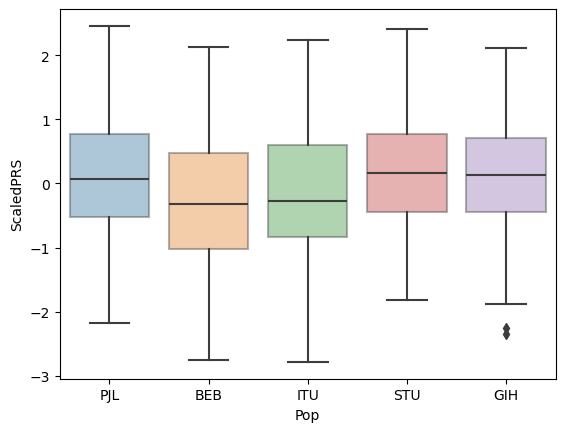

In [41]:
ax = sns.boxplot(data=scores, x="Pop", y="ScaledPRS", boxprops={'alpha': 0.4})